# Data wrangling

## Imports

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast


## Load Airbnb Data

Data is compiled on Jan 23, 2012 from [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html). There are total 7 files available as followed

- listings.csv : detailed listings data
- calendar.csv : detailed calendar data
- reviews.csv : detailed review data
- listings_sum.csv : summary information and metrics for listing (good for visulalization)
- reviews_sum.csv : summary review data and listing ID (faciliate time based analystics and visialisations linked to a listing)
- neighbourhoods.csv : neighbourhood list for geo filter. Sourced from city or open sources GIS files
- neighbourhoods.geojson : GeoJSON file for the neighbourhoods of the city


listings.csv seems to be the most relevent data for this project. listings_sum.csv can potentially provide some context as well.

In [220]:
listings = pd.read_csv('../data/listings.csv')
list_sum = pd.read_csv('../data/listings_sum.csv')

In [221]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20210123171531,2021-01-24,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20210123171531,2021-01-24,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,10.0,10.0,10.0,NaN,f,5,5,0,0,0.48
2,38245,https://www.airbnb.com/rooms/38245,20210123171531,2021-01-25,Point Loma: Den downstairs,Stay in a 1928 Spanish Style home. Den is dow...,"This neighborhood is an expensive, high-end Po...",https://a0.muscache.com/pictures/f3073822-e493...,164137,https://www.airbnb.com/users/show/164137,...,10.0,9.0,9.0,NaN,f,3,0,3,0,1.13
3,54001,https://www.airbnb.com/rooms/54001,20210123171531,2021-01-24,"La Jolla 2 Bdr Cottage: 1 Qn; 2Twns, Blks 2 Ocn","Quiet, off the beaten path, this secluded cot...","Tranquility, stately trees, meditative, zen-fu...",https://a0.muscache.com/pictures/47035b04-633c...,252692,https://www.airbnb.com/users/show/252692,...,10.0,10.0,10.0,NaN,f,2,1,1,0,2.02
4,62274,https://www.airbnb.com/rooms/62274,20210123171531,2021-01-25,"charming, colorful, close to beach","Modern, cozy, artsy, and european in a lush ga...","We are in walking distance to Starbucks, Trade...",https://a0.muscache.com/pictures/84577734/93ca...,302986,https://www.airbnb.com/users/show/302986,...,10.0,10.0,10.0,NaN,f,2,2,0,0,5.06


In [222]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9281 non-null   int64  
 1   listing_url                                   9281 non-null   object 
 2   scrape_id                                     9281 non-null   int64  
 3   last_scraped                                  9281 non-null   object 
 4   name                                          9281 non-null   object 
 5   description                                   9116 non-null   object 
 6   neighborhood_overview                         6648 non-null   object 
 7   picture_url                                   9281 non-null   object 
 8   host_id                                       9281 non-null   int64  
 9   host_url                                      9281 non-null   o

In [223]:
list_sum.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78430,-117.25258,Entire home/apt,2050,3,0,NaN,NaN,3,232
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,62,2020-11-29,0.48,5,239
2,38245,Point Loma: Den downstairs,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,74,1,143,2019-10-20,1.13,3,365
3,54001,"La Jolla 2 Bdr Cottage: 1 Qn; 2Twns, Blks 2 Ocn",252692,Marsha,NaN,La Jolla,32.81301,-117.26856,Entire home/apt,85,28,247,2021-01-09,2.02,2,131
4,62274,"charming, colorful, close to beach",302986,Isabel,NaN,Pacific Beach,32.80734,-117.24243,Entire home/apt,73,1,625,2021-01-01,5.06,2,317


In [224]:
list_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9281 non-null   int64  
 1   name                            9281 non-null   object 
 2   host_id                         9281 non-null   int64  
 3   host_name                       9278 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9281 non-null   object 
 6   latitude                        9281 non-null   float64
 7   longitude                       9281 non-null   float64
 8   room_type                       9281 non-null   object 
 9   price                           9281 non-null   int64  
 10  minimum_nights                  9281 non-null   int64  
 11  number_of_reviews               9281 non-null   int64  
 12  last_review                     78

It seems like there are missing values as well as null values existing in both 'listings' and 'list_sum'. The Price column in both DataFrame is the renting price which is the main focus of this project. Even though 'list_sum' is cleaner, we will focus on 'listings' for now because of ots amount of features

In [225]:
#drop scape data column because it is irrelevant to the listing price
columns = ['scrape_id','last_scraped']
listings = listings.drop(columns,axis =1)

## Explore The Data

### Price Column

In [226]:
listings.price

0       $2,050.00
1         $225.00
2          $74.00
3          $85.00
4          $73.00
          ...    
9276      $123.00
9277      $138.00
9278      $119.00
9279       $96.00
9280       $36.00
Name: price, Length: 9281, dtype: object

In [227]:
#is there missing values?
listings.price[listings.price.isnull()]

Series([], Name: price, dtype: object)

In [228]:
#Remove the dollar signs and convert price coumn into appropriate type
listings.price = listings.price.str.replace('$','')
listings.price = listings.price.str.replace(',','')
listings.price = pd.to_numeric(listings.price, errors='coerce')

In [229]:
listings.price.describe()

count     9281.000000
mean       237.190389
std        771.186074
min          0.000000
25%         88.000000
50%        135.000000
75%        238.000000
max      24999.000000
Name: price, dtype: float64

In [230]:
#what is the price that 99% of the listings is equal or under?
np.quantile(listings.price, .99)

1401.0

It seems that majority of the rental price is under 1401 dollars. Let's plot that for visual

<AxesSubplot:>

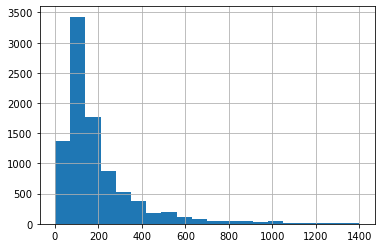

In [231]:
listings.price[listings.price<1401].hist(bins=20)

<AxesSubplot:xlabel='price', ylabel='Proportion'>

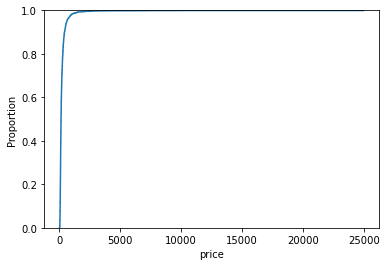

In [232]:
sns.ecdfplot(listings.price)

<AxesSubplot:xlabel='price', ylabel='Proportion'>

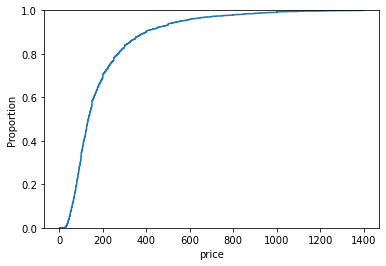

In [233]:
sns.ecdfplot(listings.price[listings.price<1401])

In [234]:
listings.price.max()

24999.0

In [235]:
listings.price.min()

0.0

In [236]:
listings[listings.price <= 0]

,id,listing_url,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7315,42875640,https://www.airbnb.com/rooms/42875640,Pacific Shores Inn,NaN,NaN,https://a0.muscache.com/pictures/2a1c18ba-843f...,311385424,https://www.airbnb.com/users/show/311385424,Pacific Shores Inn,2019-11-22,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
7316,42875642,https://www.airbnb.com/rooms/42875642,Diamond Head Inn,NaN,NaN,https://a0.muscache.com/pictures/c46e42ff-c005...,311383366,https://www.airbnb.com/users/show/311383366,Diamond Head Inn,2019-11-22,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
7406,43077965,https://www.airbnb.com/rooms/43077965,PB Surf Beachside Inn,NaN,NaN,https://a0.muscache.com/pictures/78370e0c-a5f7...,311386648,https://www.airbnb.com/users/show/311386648,PB Surf Beachside Inn,2019-11-22,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
7553,43499167,https://www.airbnb.com/rooms/43499167,La Jolla Cove,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,346934536,https://www.airbnb.com/users/show/346934536,Brandon,2020-05-20,...,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


In [237]:
# listings with $0 as price doesnt seem to hold significant values either so I will drop them
listings.drop(listings[listings['price'] <= 0].index, inplace = True)

### Missing Values

In [238]:
#Count the number of missing values in each column as well as the percentages
missing = pd.concat([listings.isnull().sum(), 100 * listings.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing = missing[missing['%']!=0]
missing.sort_values(by='%', ascending =False)

,count,%
license,9277,100.000000
calendar_updated,9277,100.000000
bathrooms,9277,100.000000
neighbourhood_group_cleansed,9277,100.000000
host_about,2788,30.052819
neighbourhood,2629,28.338903
neighborhood_overview,2629,28.338903
review_scores_value,1510,16.276814
review_scores_location,1510,16.276814
review_scores_checkin,1510,16.276814


There are 4 columns that doesn't hold any values at all: 'license','bathrooms','neighbourhood_group_cleansed' and 'calendar_updated'. These column will be dropped. Other columns that miss 10% -30% of their values can be explained as there values are not required and might not be applicable to all listings. These can be left alone for now. 

In [239]:
#drop empty columns
columns = ['license','bathrooms','neighbourhood_group_cleansed','calendar_updated']
listings = listings.drop(columns,axis =1)

### Categorical Features

#### Neighbourhood

In [240]:
#compare neighbourhood and neighbourhood_cleansed column
listings[['neighbourhood','neighbourhood_cleansed']]

,neighbourhood,neighbourhood_cleansed
0,"San Diego, California, United States",Mission Bay
1,NaN,Pacific Beach
2,"San Diego, California, United States",Roseville
3,"La Jolla, California, United States",La Jolla
4,"San Diego, California, United States",Pacific Beach
...,...,...
9276,NaN,College Area
9277,NaN,East Village
9278,"San Diego, California, United States",Mission Bay
9279,NaN,Balboa Park


In [241]:
#drop neighbourhood column
listings = listings.drop('neighbourhood',axis =1)

#### Dupplicate listings

In [242]:
listings['id'].value_counts().head()

4558846     1
25017669    1
11907983    1
23074208    1
46545165    1
Name: id, dtype: int64

In [243]:
listings['name'].value_counts().head(20)

Upscale 2BR w/ hotel-like amenities in San Diego    17
Hotel near Del Mar, 1 Queen & Sleeper, Breakfast     8
California Dreams – Bed in Fun Beach Hostel          8
Upscale 1BR w/ hotel-like amenities in San Diego     7
A place of your own | 1BR in San Diego               7
Rest easy and live life | 1BR in San Diego           7
Professionally maintained apt | 2BR in San Diego     6
A place of your own | 2BR in San Diego               4
Relax in an apt of your own | 1BR in San Diego       4
Rest easy and live life | Studio in San Diego        4
Resort Style Community | 1BR in San Diego            4
A home you will love | 1BR in Chula Vista            4
One bedroom cottage at Blue Heron Cottages           4
Downtown San Diego                                   3
Sunny San Diego                                      3
Room for rent                                        3
Pantai Inn- 1 bedroom suite                          3
Master Bedroom                                       3
Private Ro

Interesting. Even though all the id is unique but a second look at the name shows that there are some duplications

In [244]:
dupl_0 = listings[listings.name == 'Upscale 2BR w/ hotel-like amenities in San Diego']
dupl_0.nunique().sort_values(ascending=False).head(10)

id                  17
listing_url         17
availability_365    13
availability_90     13
availability_60     11
price                6
availability_30      6
amenities            4
accommodates         1
host_location        1
dtype: int64

These entries seems to be the same location and same room type but with slightly different price and amenities and different availability. Need to investigate why. Are other duplications similar?

In [245]:
dupl_1 = listings[listings.name == 'Hotel near Del Mar, 1 Queen & Sleeper, Breakfast']
dupl_1.nunique().sort_values(ascending=False).head(10)

id                       8
last_review              8
listing_url              8
longitude                8
latitude                 7
first_review             7
reviews_per_month        7
amenities                6
number_of_reviews_ltm    5
number_of_reviews        5
dtype: int64

In [246]:
dupl_2 = listings[listings.name == 'California Dreams – Bed in Fun Beach Hostel']
dupl_2.nunique().sort_values(ascending=False).head(10)

reviews_per_month        8
last_review              8
listing_url              8
description              8
picture_url              8
first_review             8
amenities                8
id                       8
number_of_reviews        7
number_of_reviews_ltm    6
dtype: int64

Not sure if there is any consistanecies between these similar looking listings. Leave them for now

#### Neighbourhood

In [247]:
listings['neighbourhood_cleansed'].nunique()

102

In [248]:
listings.neighbourhood_cleansed.value_counts().sort_values(ascending=False)

Mission Bay                    1441
Pacific Beach                   744
La Jolla                        660
East Village                    550
Ocean Beach                     432
                               ... 
Tijuana River Valley              3
Eastlake Woods                    2
Amphitheater And Water Park       2
Lincoln Park                      2
Palm City                         2
Name: neighbourhood_cleansed, Length: 102, dtype: int64

In [249]:
listings.neighbourhood_cleansed.describe()

count            9277
unique            102
top       Mission Bay
freq             1441
Name: neighbourhood_cleansed, dtype: object

Text(0.5, 0, 'Count')

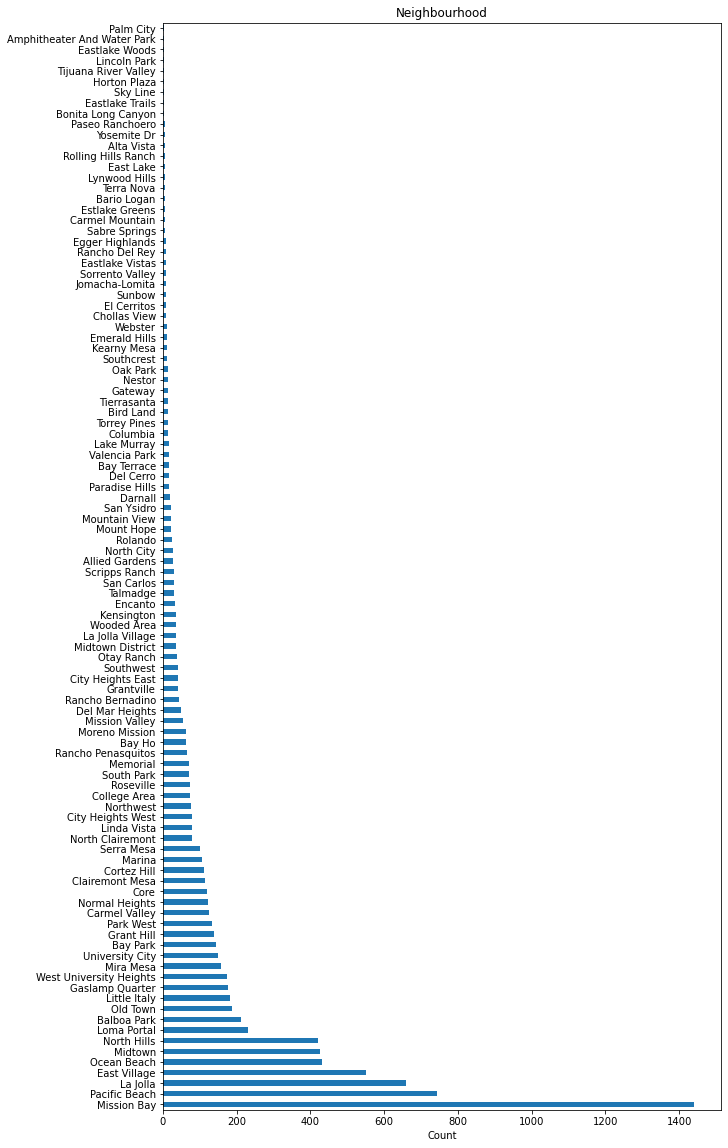

In [250]:
#plot number of histings in each neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(10,20))
listings.neighbourhood_cleansed.value_counts().plot(kind='barh')
ax.set_title('Neighbourhood')
ax.set_xlabel('Count')

In [251]:
neighbour_price = listings.groupby('neighbourhood_cleansed').price.agg(np.mean)

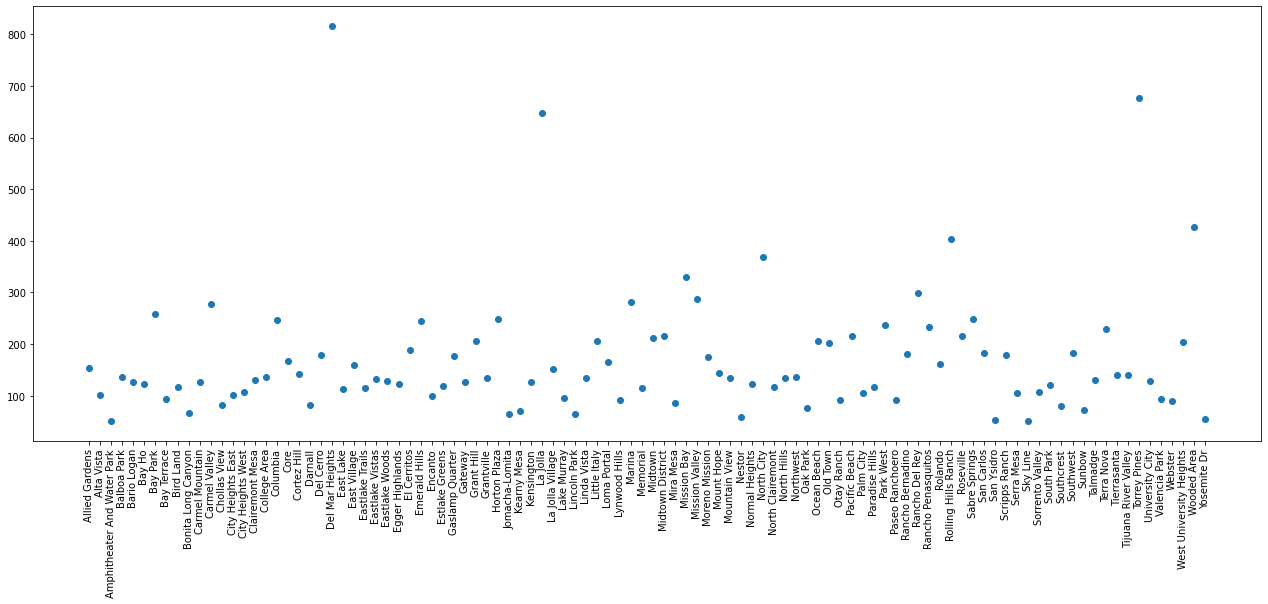

In [252]:
#plot average listing price in each neighbourhood
plt.figure(figsize=(22,8))
plt.scatter(neighbour_price.index, neighbour_price)
plt.xticks(rotation = 90)
plt.show()

In [253]:
# There are 3 neighbourhood that are more expensive than the rest on average. Which ones?
neighbour_price[neighbour_price>600]

neighbourhood_cleansed
Del Mar Heights    816.083333
La Jolla           647.184848
Torrey Pines       675.933333
Name: price, dtype: float64

#### Amenities

In [254]:
listings.amenities

0       ["Stove", "Smoke alarm", "Refrigerator", "Kitc...
1       ["Hot water", "Smoke alarm", "Kitchen", "Hair ...
2       ["Hot water", "Smoke alarm", "Kitchen", "First...
3       ["Hot water", "Keurig coffee machine", "Beach ...
4       ["Hot water", "Smoke alarm", "Refrigerator", "...
                              ...                        
9276    ["Hot water", "Stove", "Smoke alarm", "Refrige...
9277    ["Gym", "Essentials", "Dryer", "Hangers", "TV"...
9278    ["Hot water", "Stove", "Smoke alarm", "Refrige...
9279    ["Hot water", "Keurig coffee machine", "Stove"...
9280    ["Hot water", "Keurig coffee machine", "Mini f...
Name: amenities, Length: 9277, dtype: object

In [255]:
#see what type of data is the list of emenities is held as
type(listings.amenities[0])

str

In [272]:
#convert the string representation of list into list of amenities
amenities = []
for i in listings.amenities.index:
    amenities.insert(i, ast.literal_eval(listings.amenities[i]))
type (amenities[0])

list

In [274]:
#add the amenities list back into DataFrame
listings.amenities = amenities
type(listings.amenities[0])

list

## Save Data

In [283]:
listings.to_csv('../listings_cleaned.csv', index=False)